# Local Binary pattern

<i>Explanation</i> 

In [2]:
# <libraries>
from skimage import io
from skimage import data,exposure
from skimage import util
from skimage.util import random_noise
from skimage.transform import rescale,rotate
from skimage.feature import local_binary_pattern
from skimage.filters import gaussian
from skimage.color import rgb2gray,grey2rgb
import numpy as np
from numpy import asarray
import cv2
import matplotlib.pyplot as plt
import sys,glob,os,warnings
import time
%matplotlib inline

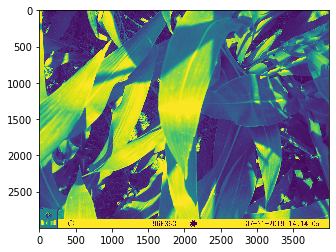

In [3]:
# Get the testing file 
# You can use any file from the testData folder

original_image   = io.imread('images/testData/longleaf.jpeg',as_gray=True) # load the data in gray scale
plt.imshow(original_image)

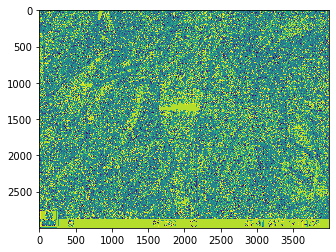

In [8]:
radius = 1
point_count = 8 * radius
Method = 'UNIFORM'
ldp_test = local_binary_pattern(original_image,point_count,radius,Method)
plt.imshow(ldp_test)

<h3>The binary test is a  8-bit array</h3>

In [156]:
# A instance of  binary values 
2 ** np.arange(8, dtype=np.int32)

array([  1,   2,   4,   8,  16,  32,  64, 128], dtype=int32)

In [136]:
# Taking a small part from the picture
crop = original_image[0:3,0:3]
print(crop)

[[0.98531922 0.98531922 0.98531922]
 [0.98531922 0.98531922 0.98531922]
 [0.98473176 0.98416627 0.98416627]]


In [140]:
# Find the ldp from the by using skiimage local_binary_pattern
method = 'UNIFORM'
radius = 1
point_count = 8 * radius
ldp = local_binary_pattern(crop, point_count, radius, method)
print(ldp)

[[3. 5. 3.]
 [3. 5. 3.]
 [2. 5. 3.]]


In [206]:
np_crop = np.array(crop)
print(np_crop)

[[0.98531922 0.98531922 0.98531922]
 [0.98531922 0.98531922 0.98531922]
 [0.98473176 0.98416627 0.98416627]]


In [157]:
rows,cols = np_crop.shape
print("rows",rows)
print("coloumns",cols)
# [1,1] carries the middle cell
middle_cell = np_crop[1,1]
for i in range(rows):
    for j in range(cols):
        #print(np_crop[i,j])
        if(middle_cell == np_crop[i,j] ):
            print(i,j,"same")
            np_crop[i,j] = 1
        elif(middle_cell >= np_crop[i,j]):
            print(i,j,"bigger")
            np_crop[i,j] = 0
        elif((middle_cell < np_crop[i,j])):
            print(i,j,"smalller")
            np_crop[i,j]

rows 3
coloumns 3
0 0 same
0 1 same
0 2 same
1 0 same
1 1 same
1 2 same
2 0 bigger
2 1 bigger
2 2 bigger


# Assign values to get a good idea about the algorithm

In [125]:
dummy_image = np.array([[5, 8, 1],[5, 4, 1,],[3, 7, 2]])

print(dummy_image)
print("______________")

middle_cell = dummy_image[1,1]

for i in range(rows):
    for j in range(cols):
        if(middle_cell >= dummy_image[i,j]):
            print(i,j,"bigger")
            dummy_image[i,j] = 1
        elif((middle_cell < dummy_image[i,j])):
            print(i,j,"smalller")
            dummy_image[i,j] = 0
            
dummy_image[1,1] = 2 # center

[[5 8 1]
 [5 4 1]
 [3 7 2]]
______________
0 0 smalller
0 1 smalller
0 2 bigger
1 0 smalller
1 1 bigger
1 2 bigger
2 0 bigger
2 1 smalller
2 2 bigger


In [158]:
print("Number 3 is the center array")
dummy_image


Number 3 is the center array


array([[0, 0, 1],
       [0, 2, 1],
       [1, 0, 1]])

In [204]:
c = (2**(0))* dummy_image[0,0]+(2**(1))* dummy_image[0,1]+(2**(2))* dummy_image[0,2]+(2**(3)) * dummy_image[1,2]+(2**(4)) * dummy_image[2,2]+(2**(5))*dummy_image[2,1]+(2**(6))*dummy_image[2,0]+(2**(7)) * dummy_image[1,0]

In [205]:
c

92

<h3>bilinear_interpoplation</h3>

In [159]:
w_cen  =  (1-1/np.sqrt(2))**2  # Weights
w_diag  =  (1/np.sqrt(2))**2
w_orto  =  (1-1/np.sqrt(2))*(1/np.sqrt(2))

def bilinear_interpoplation(i_cen, i_diag, i_hor, i_ver):
    return i_cen*w_cen + i_diag*w_diag + i_hor*w_orto + i_ver*w_orto

def circular_neighbourhood(x):
    [I7, I6, I5] = x[0, :]
    [I0, Ic, I4] = x[1, :]
    [I1, I2, I3] = x[2, :]
    I7i = bilinear_interpoplation(Ic, I7, I0, I6)
    I5i = bilinear_interpoplation(Ic, I5, I4, I6)
    I3i = bilinear_interpoplation(Ic, I3, I4, I2)
    I1i = bilinear_interpoplation(Ic, I1, I0, I2)
    interpolated = np.array([[I7i, I6, I5i], 
                             [ I0, Ic,  I4], 
                             [I1i, I2, I3i]])
    return interpolated

def binary_pattern(x):
    return np.where(x >= x[1, 1], 1, 0)

def display_lbps(patch):
    interpolated = circular_neighbourhood(patch)
    print('Patch =')
    print(patch)
    print('LBP of patch =')
    print(binary_pattern(patch))
    print('Interpolated patch =')
    print(interpolated)
    print('LBP of interpolated patch =')
    print(binary_pattern(interpolated))

#display_lbps(image[0:3, 0:3])
display_lbps(crop[0:3, 0:3])

#display_lbps(image[1:4, 1:4])
#display_lbps(crop[1:4, 1:4])

Patch =
[[0.98531922 0.98531922 0.98531922]
 [0.98531922 0.98531922 0.98531922]
 [0.98473176 0.98416627 0.98416627]]
LBP of patch =
[[1 1 1]
 [1 1 1]
 [0 0 0]]
Interpolated patch =
[[0.98531922 0.98531922 0.98531922]
 [0.98531922 0.98531922 0.98531922]
 [0.98478671 0.98416627 0.98450396]]
LBP of interpolated patch =
[[0 1 0]
 [1 1 1]
 [0 0 0]]


<h3>kullback leibler divergence reviced (KLD)</h3>

- It measurse how one probability distributution is different from the
second one 
- Its also called as  relative entropy

In [208]:
def kullback_leibler_divergence(p_samples, q_samples):
    """
    This function would calculate divergence from two vectors from a  samples from distributions
    Args:
        param1 (p) : vector1  : list
        param2 (q) : vector2  : list
        
    Retrun : 
        Divergence 
    """
    # convert to numpy array
    p = np.asarray(p_samples)
    q = np.asarray(q_samples)
    filt = np.logical_and(p != 0, q != 0) # both p and q needs to be true return true 
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

p = [0.20,0.40,0.50]
q = [0.60,0.15,0.05]

print(kullback_leibler_divergence(p,q))

p = [0.60,0.15,0.05]
q = [0.60,0.15,0.05]

print(kullback_leibler_divergence(p,q))


1.9099865470109874
0.0


In [152]:
# settings for LBP
radius   = 1
n_points = 8 * radius
METHOD   = 'UNIFORM'

def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


crop_1     = original_image[0:3,0:3]
crop_1_ldp = local_binary_pattern(crop_1, n_points, radius, METHOD)

crop_2     = original_image[4:7,4:7]
crop_2_ldp = local_binary_pattern(crop_2, n_points, radius, METHOD)


best_score = 10

n_bins      = int(crop_1_ldp.max() + 1)

hist, _     = np.histogram(crop_1_ldp, density=True, bins=n_bins, range=(0, n_bins))
ref_hist, _ = np.histogram(crop_2_ldp, density=True, bins=n_bins,range=(0, n_bins))
score       = kullback_leibler_divergence(hist, ref_hist)


score

1.2627253307333646

**Skimage ldp**

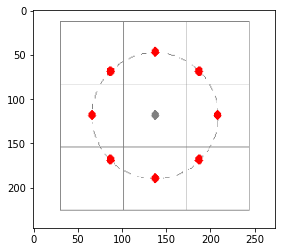

In [186]:
bilinear   = io.imread('images/other/bilinear_interpolation_circle.PNG')  # load the data in gray scale
plt.imshow(bilinear)


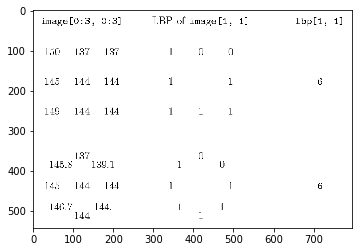

In [187]:
bilinear_val   = io.imread('images/other/bilinear_interpolation.PNG')  # load the data in gray scale
plt.imshow(bilinear_val)

crop1 image
[[3. 5. 3.]
 [3. 5. 3.]
 [2. 5. 3.]]
crop2 image
[[0. 1. 1.]
 [3. 4. 6.]
 [3. 4. 0.]]


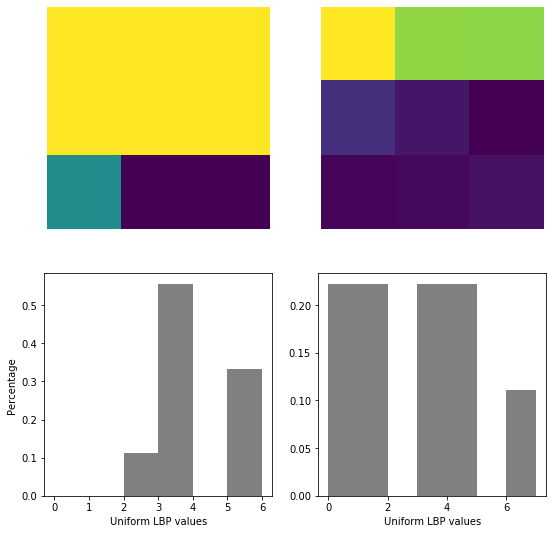

In [172]:
# hist function 
# histogram is a bar chart where y axis contains the frequency of a variable
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),facecolor='0.5') # ravel() : flattening the array

# plot histograms of LBP of textures
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(9, 9))

print("crop1 image")
print(crop_1_ldp)

print("crop2 image")
print(crop_2_ldp)


ax1.imshow(crop_1)
ax1.axis('off')
hist(ax3, crop_1_ldp)
ax3.set_ylabel('Percentage')
ax3.set_xlabel('Uniform LBP values')

ax2.imshow(crop_2)
ax2.axis('off')
hist(ax4, crop_2_ldp)
ax4.set_xlabel('Uniform LBP values')


plt.show()

**References** 

>[PeterPeter 7511 silver badge77 bronze badges, Emmanuelle GouillartEmmanuelle Gouillart 59133 silver badges33 bronze badges & TonechasTonechas 9, 1966. Why does the local_binary_pattern function in scikit-image provide same value for different patterns? Stack Overflow. Available at: https://stackoverflow.com/questions/39011167/why-does-the-local-binary-pattern-function-in-scikit-image-provide-same-value-fo [Accessed May 6, 2020]. ] (https://stackoverflow.com/questions/39011167/why-does-the-local-binary-pattern-function-in-scikit-image-provide-same-value-fo)